# Data Visualization in R
## by Diya Das

### The goal
Data visualization, like all visualization, is important because it tells a story. Take a moment to think about what stories you'd like to tell with your data. 

There's an important component of data visualization - deciding what kind of plot is appropriate to make a particular point - that we're not going to talk about today. If you're interested in thinking about principles of good visualization, I encourage you to research that topic further. You could start with Edward Tufte.

Instead, today, I'm going to be giving examples of how to make plots in R, using both base R and the occasional `ggplot` command, as well as a 3D plotting library called `rgl`. (Why? because WHY SHOULD YOU NOT GIF YOUR DATA?)

### The datasets
We are going to be using the data from the R package [`nycflights13`](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf). There are five datasets corresponding to flights departing NYC in 2013. We will **load directly into R from the library**, but the repository also includes TSV files we created for the purposes of the Python demo and can also be used to load the data into our R session.

*** If you've never run Jupyter notebooks with R, please run `conda install -c r r-essentials`

In [4]:
options(repos=structure(c(CRAN="http://cran.cnr.berkeley.edu/", 
BioCsoft="http://www.bioconductor.org/packages/release/bioc/")))
ipak <- function(pkg){
     new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
     if (length(new.pkg))
         install.packages(new.pkg, dependencies = TRUE)
     sapply(pkg, require, character.only = TRUE)
 } #https://gist.github.com/stevenworthington/3178163

pkgs <- c("nycflights13", "ggplot2", "rgl")
ipak(pkgs)

nycflights13      ggplot2          rgl 
        TRUE         TRUE         TRUE

In [ ]:
#invisible(sapply(pkgs, library, character.only=TRUE )) 
    # if you knew you had installed the packages

## Basic scatterplots
Let's run through an example using the `flights` dataset. This dataset includes...well what does it include? You could read the documentation, but let's take a look first. 

What are the dimensions of the flights data frame?

In [5]:
flights <- data.frame(flights) # dplyr has introduced a new data format that I am ignoring
dim(flights)

[1] 336776     19

Figure out the categories of data.

In [18]:
summary(flights)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

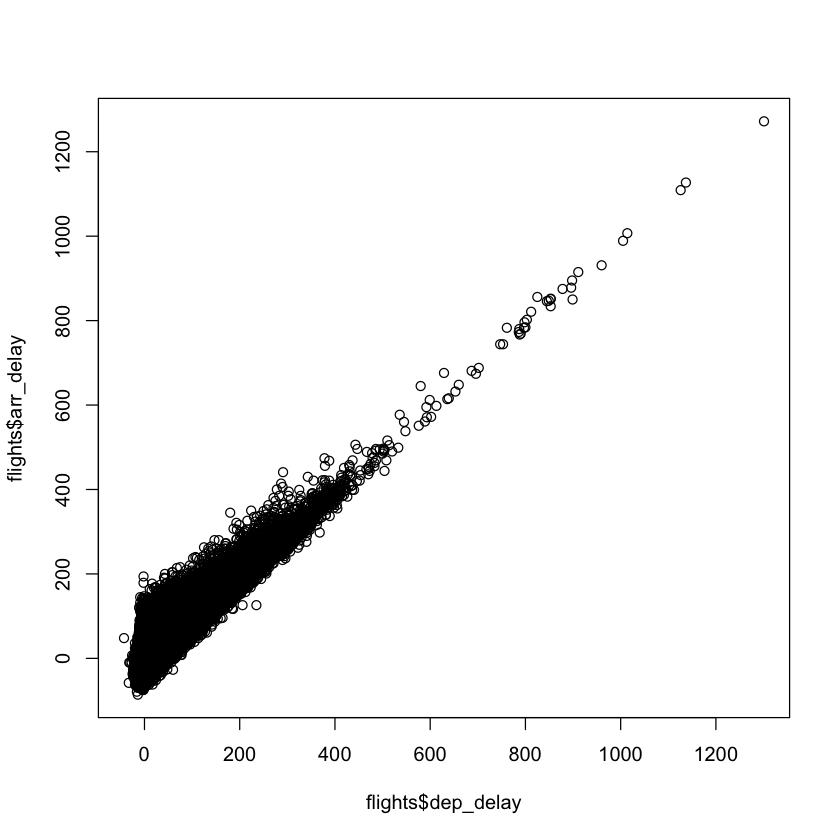

In [19]:
flights <- flights[complete.cases(flights),]
plot(flights$dep_delay, flights$arr_delay)

## Changing aesthetic parameters

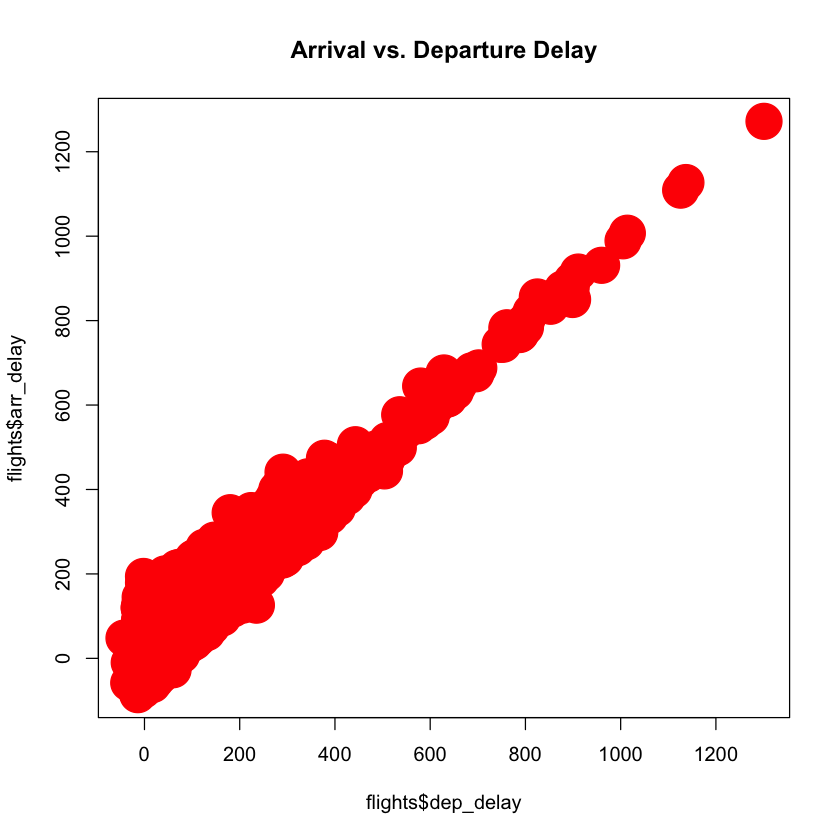

In [24]:
plot(flights$dep_delay, flights$arr_delay, cex=4, pch=19, 
     col="red", main= "Arrival vs. Departure Delay")

In [7]:
flights$origin <- factor(flights$origin)
colpal <- scales::alpha(c("red","green","blue"),0.3)

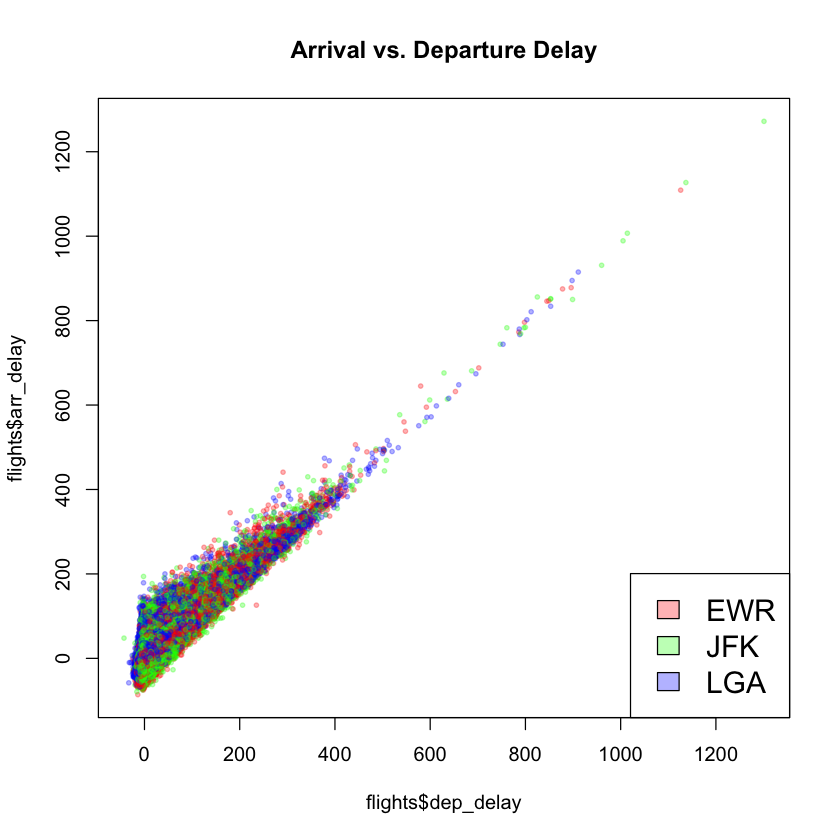

In [32]:
plot(flights$dep_delay, flights$arr_delay, cex=0.5, pch=19,
     col=colpal[flights$origin], main= "Arrival vs. Departure Delay")
legend("bottomright",levels(flights$origin),fill=colpal,
       cex=1.5, xpd=TRUE)

## Histograms

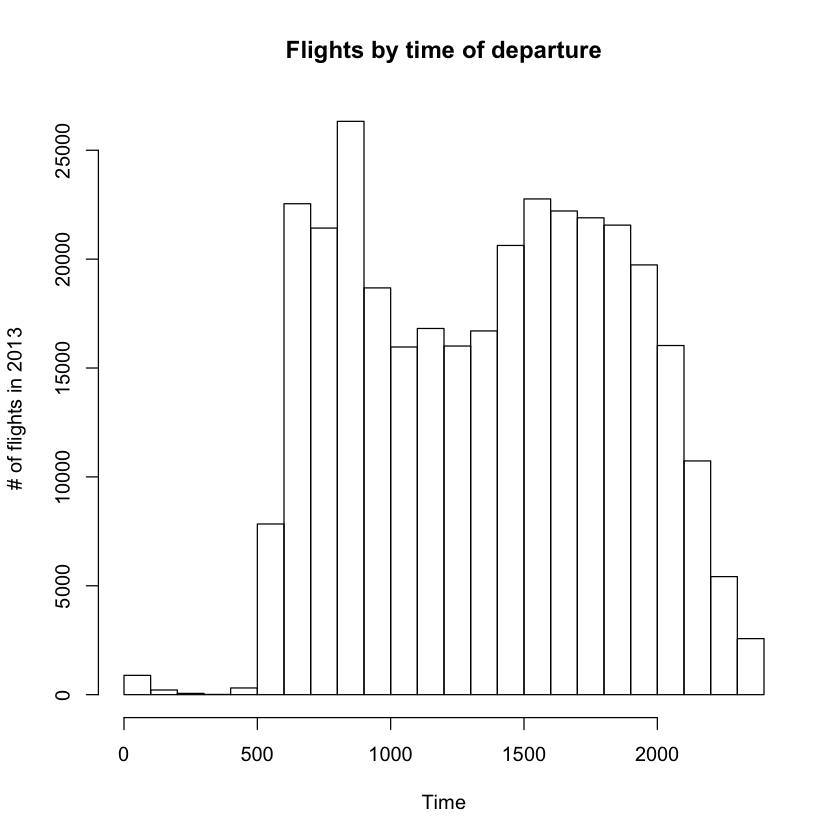

In [35]:
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in 2013")

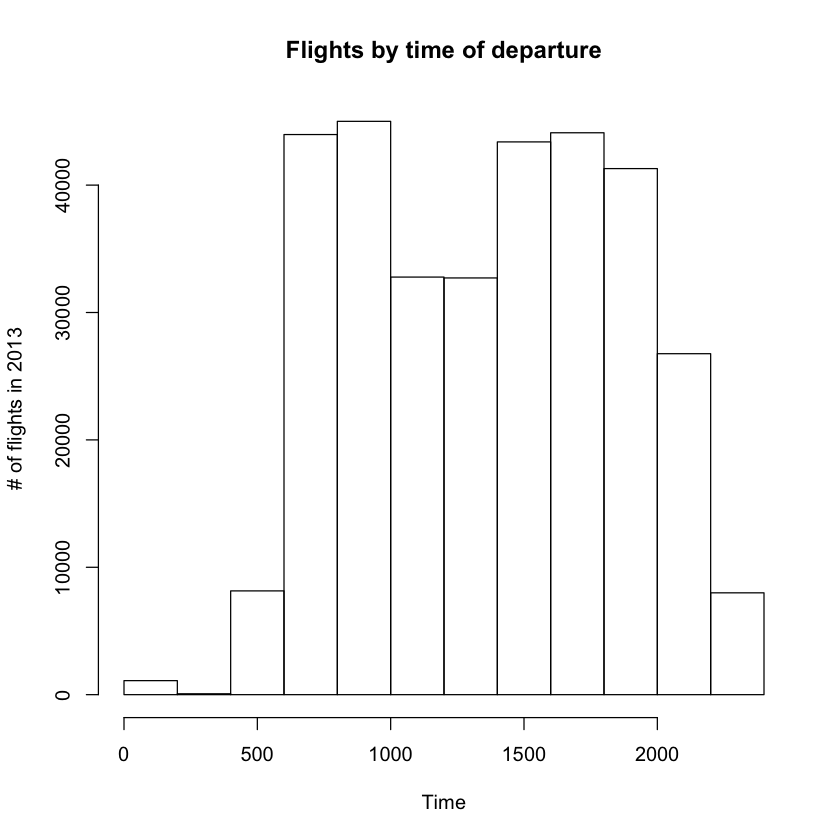

In [40]:
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in 2013",breaks=10)

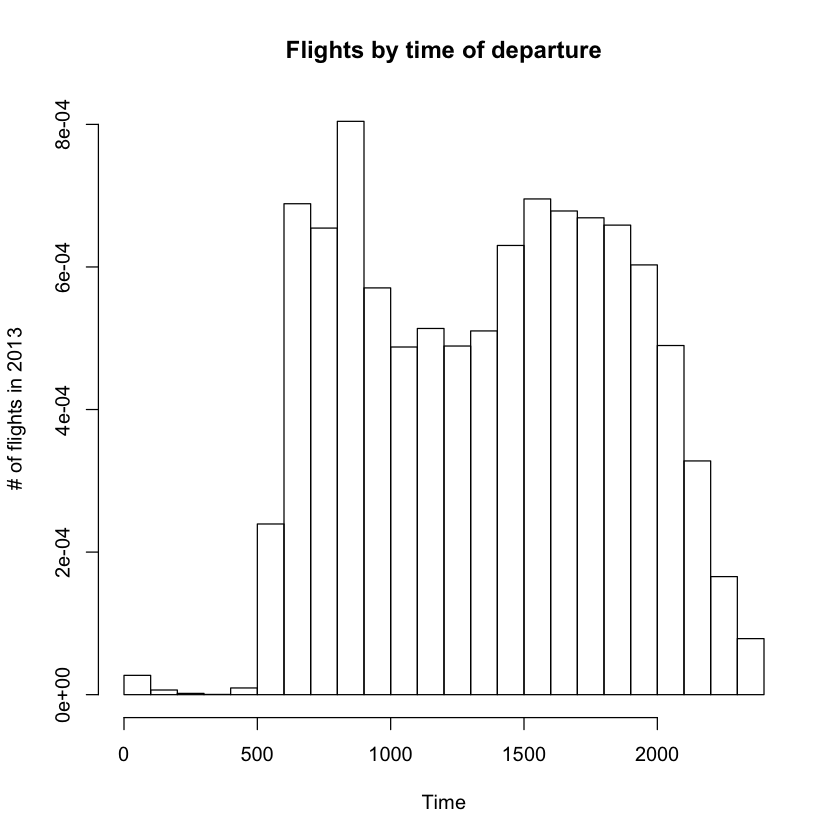

In [43]:
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in 2013",breaks=24, freq=FALSE)

## Plot organization and margins

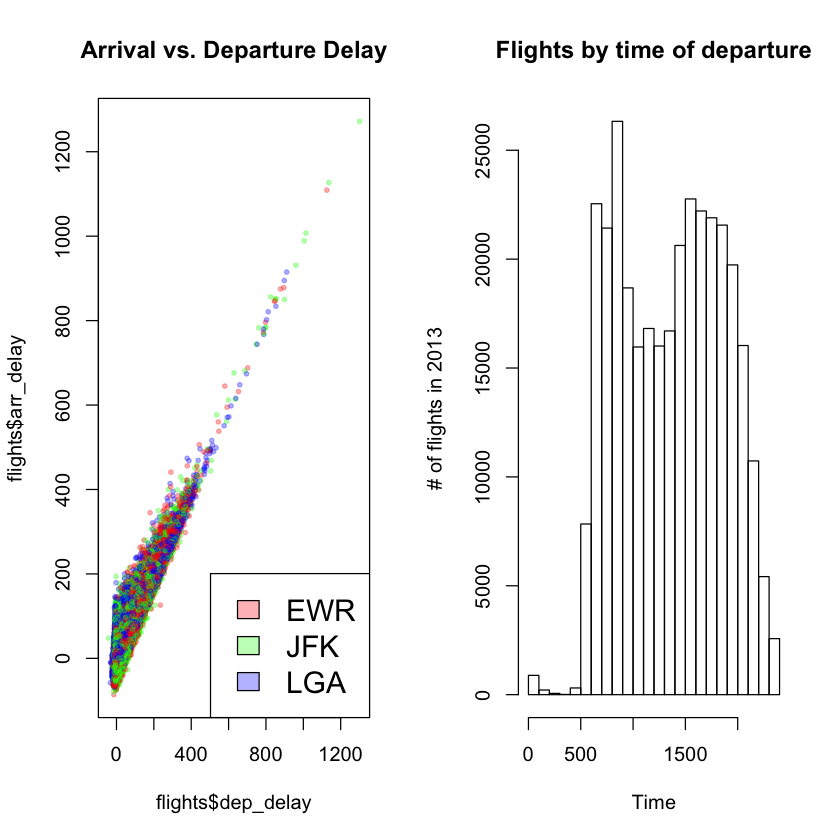

In [55]:
par(mfrow=c(1,2))
plot(flights$dep_delay, flights$arr_delay, cex=0.5, pch=19,
     col=colpal[flights$origin], main= "Arrival vs. Departure Delay")
legend("bottomright",levels(flights$origin),fill=colpal,
       cex=1.5, xpd=FALSE)

hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in 2013")


In [16]:
jitter(rep(0,10),0.2)
par.defaults <- par()

[1]  0.0033807916  0.0018629876  0.0030364894  0.0008760971 -0.0004785596
 [6] -0.0009654199  0.0028224410  0.0031354174  0.0027520303 -0.0035770058

Warning message in par(par.defaults):
“graphical parameter "cin" cannot be set”Warning message in par(par.defaults):
“graphical parameter "cra" cannot be set”Warning message in par(par.defaults):
“graphical parameter "csi" cannot be set”Warning message in par(par.defaults):
“graphical parameter "cxy" cannot be set”Warning message in par(par.defaults):
“graphical parameter "din" cannot be set”Warning message in par(par.defaults):
“graphical parameter "page" cannot be set”

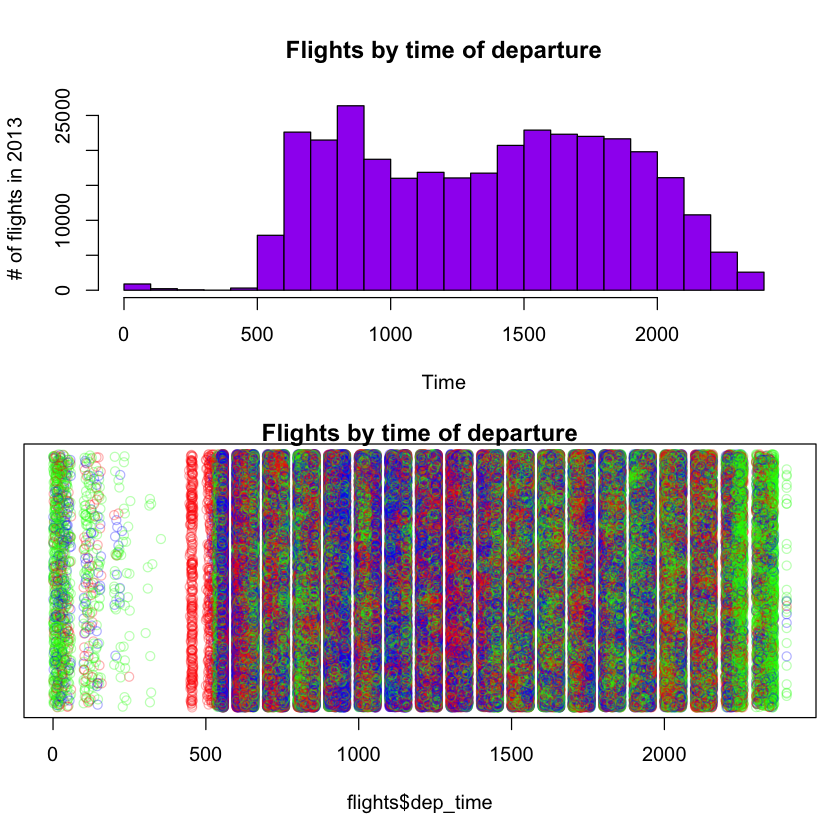

In [17]:
par(mfrow=c(2,1))
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in 2013", col="purple")
par(mar=c(5.1,1,1,1))
plot(flights$dep_time, jitter(rep(0, nrow(flights)), 0.3),
     main="Flights by time of departure", col=colpal[flights$origin],yaxt='n', ylab='')
par(par.defaults)

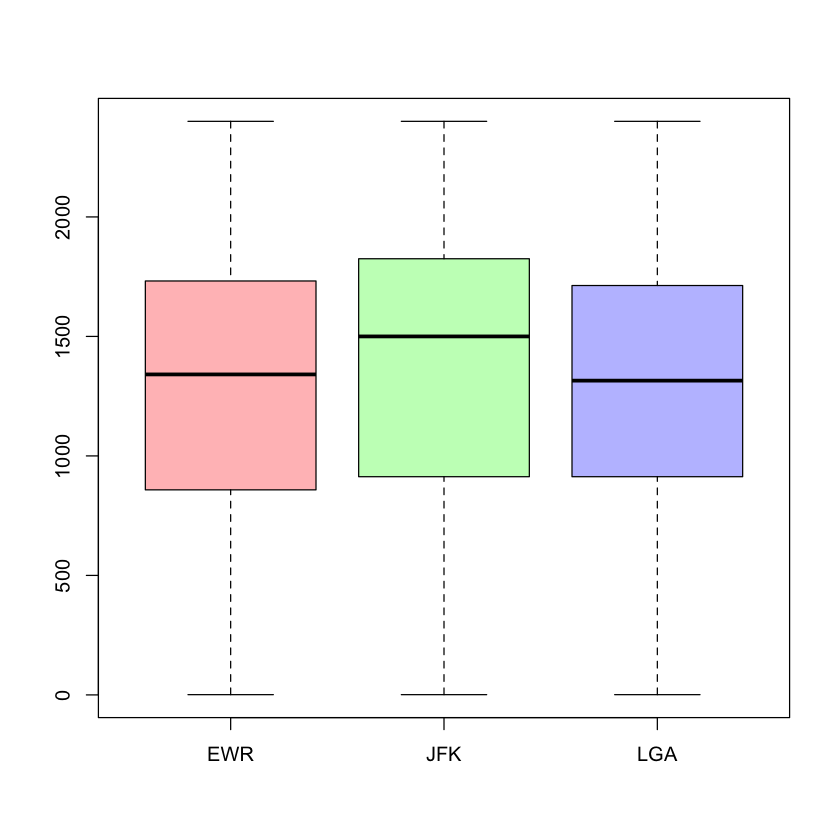

In [67]:
boxplot(dep_time ~ origin, data=flights, col=colpal)

## 3D plotting

In [73]:
plot3d(flights$distance, flights$air_time, flights$arr_delay)
par3d(windowRect = c(20, 30, 800, 800))
print(getwd())
movie3d(spin3d(), 5, movie = "movie", frames = "movie", dir = getwd(), 
                    convert = TRUE, clean = TRUE, verbose=TRUE,
                    top = TRUE, type = "gif") 

[1] "/Users/diyadas/gitp/tutorials"
Writing 'movie050.png'
Will create: /Users/diyadas/gitp/tutorials/movie.gif
Executing: 'convert -delay 1x10 movie*.png movie.gif'
Deleting frames
